In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = datasets.fetch_lfw_people(min_faces_per_person=10)
data

{'data': array([[0.        , 0.        , 0.        , ..., 0.28366014, 0.01045752,
         0.        ],
        [0.17385621, 0.18431373, 0.21176471, ..., 0.06797386, 0.01437909,
         0.00261438],
        [0.        , 0.        , 0.        , ..., 0.5581699 , 0.5555556 ,
         0.5647059 ],
        ...,
        [0.        , 0.5150327 , 0.8052287 , ..., 0.00392157, 0.00130719,
         0.        ],
        [0.        , 0.00130719, 0.00261438, ..., 0.63137263, 0.6431373 ,
         0.4261438 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 'images': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.00261438, 0.        , 0.08627451, ..., 0.21960784,
     

In [3]:
data.data.shape

(4324, 2914)

In [4]:
data.images.shape

(4324, 62, 47)

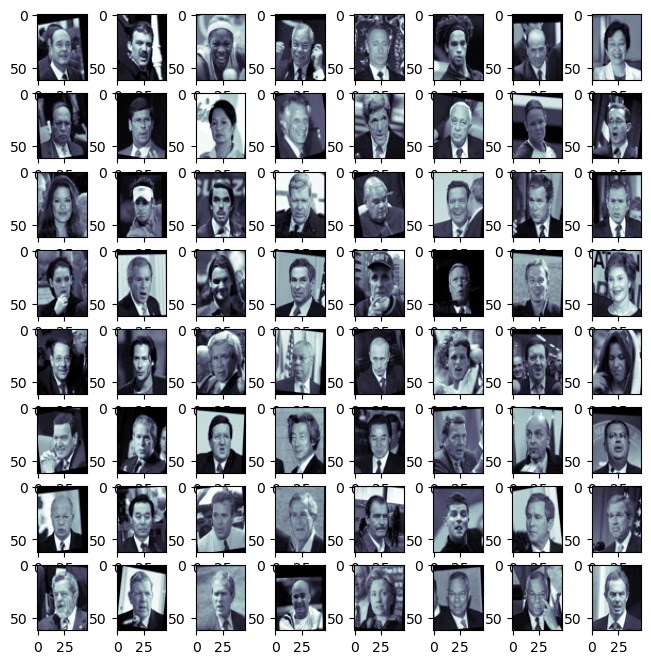

In [5]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(data.images[i], cmap=plt.cm.bone)

In [6]:
def find_k(data, s):
    pca = PCA()
    pca.fit_transform(data.data)
    
    k = 0
    total_sum = sum(pca.explained_variance_)
    current = 0
    while current/total_sum < s:
        current += pca.explained_variance_[k]
        k += 1
    return k

In [7]:
find_k(data.data, 0.99)

812

In [8]:
find_k(data.data, 0.97)

419

In [9]:
find_k(data.data, 0.95)

273

In [10]:
X = data.data
Y = data.target

In [11]:
X.shape, Y.shape

((4324, 2914), (4324,))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3243, 2914), (1081, 2914), (3243,), (1081,))

In [22]:
pca = PCA(n_components=276)
train_transform = pca.fit_transform(X_train)
test_transform = pca.transform(X_test)

In [25]:
data.images.shape

(4324, 62, 47)

In [23]:
train_transform.shape, test_transform.shape

((3243, 276), (1081, 276))

In [30]:
inversed_data = pca.inverse_transform(train_transform)
train_data = inversed_data.reshape((3243, 62, 47))
train_data.shape

(3243, 62, 47)

In [ ]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.im